# Preparation

## Import Libraries

In [ ]:
!pip install logitboost

import numpy as np
import pandas as pd
import seaborn as sns
import re
import os
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, fbeta_score, matthews_corrcoef,
    confusion_matrix, roc_auc_score
    )

# Model Making
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from logitboost import LogitBoost
from xgboost import XGBClassifier

## Set the directory

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
os.chdir('/gdrive/MyDrive/skripsi/fix')
os.getcwd()

Mounted at /gdrive


'/gdrive/MyDrive/skripsi/fix'

# Dataset

## Import Dataset

In [ ]:
data = pd.read_excel('data_askes.xlsx')

In [ ]:
print("Data Klaim \n\n", data.head())

Data Klaim 

            no_polis produk  tgl_mulai  tgl_akhir jenis_klaim  jumlah_hari  \
0  3466/PK-KES/0418      B 2020-04-01 2021-03-31          RL          0.0   
1  3849/PK-KES/1018      B 2019-10-14 2020-10-12          RI          3.0   
2  3849/PK-KES/1018      B 2019-10-14 2020-10-12          RI          0.0   
3  3849/PK-KES/1018      B 2019-10-14 2020-10-12          RI          3.0   
4  3524/PK-KES/0618      B 2019-06-01 2020-05-30          RI          4.0   

   jumlah_klaim            tgl_rawat            tgl_klaim klasifikasi_klaim  \
0     3860796.0  2020-01-05 00:00:00  2021-01-04 00:00:00           REGULER   
1     3000000.0  2020-04-17 00:00:00  2021-01-14 00:00:00           REGULER   
2     1085142.0  2020-04-17 00:00:00  2021-01-14 00:00:00           REGULER   
3      655000.0  2020-04-17 00:00:00  2021-01-14 00:00:00           REGULER   
4     2348500.0  2020-05-13 00:00:00  2021-01-14 00:00:00           REGULER   

   ...                                      nama

In [ ]:
df = data.copy()

## Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62312 entries, 0 to 62311
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   no_polis           60232 non-null  object        
 1   produk             62312 non-null  object        
 2   tgl_mulai          57313 non-null  datetime64[ns]
 3   tgl_akhir          57313 non-null  datetime64[ns]
 4   jenis_klaim        57312 non-null  object        
 5   jumlah_hari        57302 non-null  float64       
 6   jumlah_klaim       57306 non-null  float64       
 7   tgl_rawat          62312 non-null  datetime64[ns]
 8   tgl_klaim          60242 non-null  datetime64[ns]
 9   klasifikasi_klaim  57313 non-null  object        
 10  no_klaim           57313 non-null  object        
 11  kode_klinik        57065 non-null  object        
 12  nama_klinik        60241 non-null  object        
 13  area               59520 non-null  object        
 14  no_sur

## Data Cleaning

### Remove Duplicate

In [ ]:
dup_rows = df.dup().sum()
print(f"Banyak data duplikat: {dup_rows}")

Number of duplicate rows in DataFrame: 2205


In [ ]:
unique_df = df.drop_duplicates()
len(unique_df)

60107

In [ ]:
df=unique_df.copy()

### Remove Unused Columns

In [ ]:
df_clean = df.drop(['no_polis', 'kode_klinik', 'no_surat',
                    'ket', 'kode_diagnosis', 'nama_diagnosis'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60107 entries, 0 to 62268
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   produk             60107 non-null  object        
 1   tgl_mulai          57286 non-null  datetime64[ns]
 2   tgl_akhir          57286 non-null  datetime64[ns]
 3   jenis_klaim        57285 non-null  object        
 4   jumlah_hari        57275 non-null  float64       
 5   jumlah_klaim       57279 non-null  float64       
 6   tgl_rawat          60107 non-null  datetime64[ns]
 7   tgl_klaim          59981 non-null  datetime64[ns]
 8   klasifikasi_klaim  57286 non-null  object        
 9   no_klaim           57286 non-null  object        
 10  nama_klinik        59980 non-null  object        
 11  area               59299 non-null  object        
 12  grup_diagnosis     57275 non-null  object        
 13  jenis_kelamin      57286 non-null  object        
 14  usia  

### Handling Missing Value

In [ ]:
# Missing value counts
missing_count_per_row = df.isnull().sum(axis=1)
rows_with_missing = len(missing_count_per_row[missing_count_per_row > 0])
print("Number of rows with missing values:", rows_with_missing)

Number of rows with missing values: 3892


Axes(0.125,0.11;0.698618x0.77)


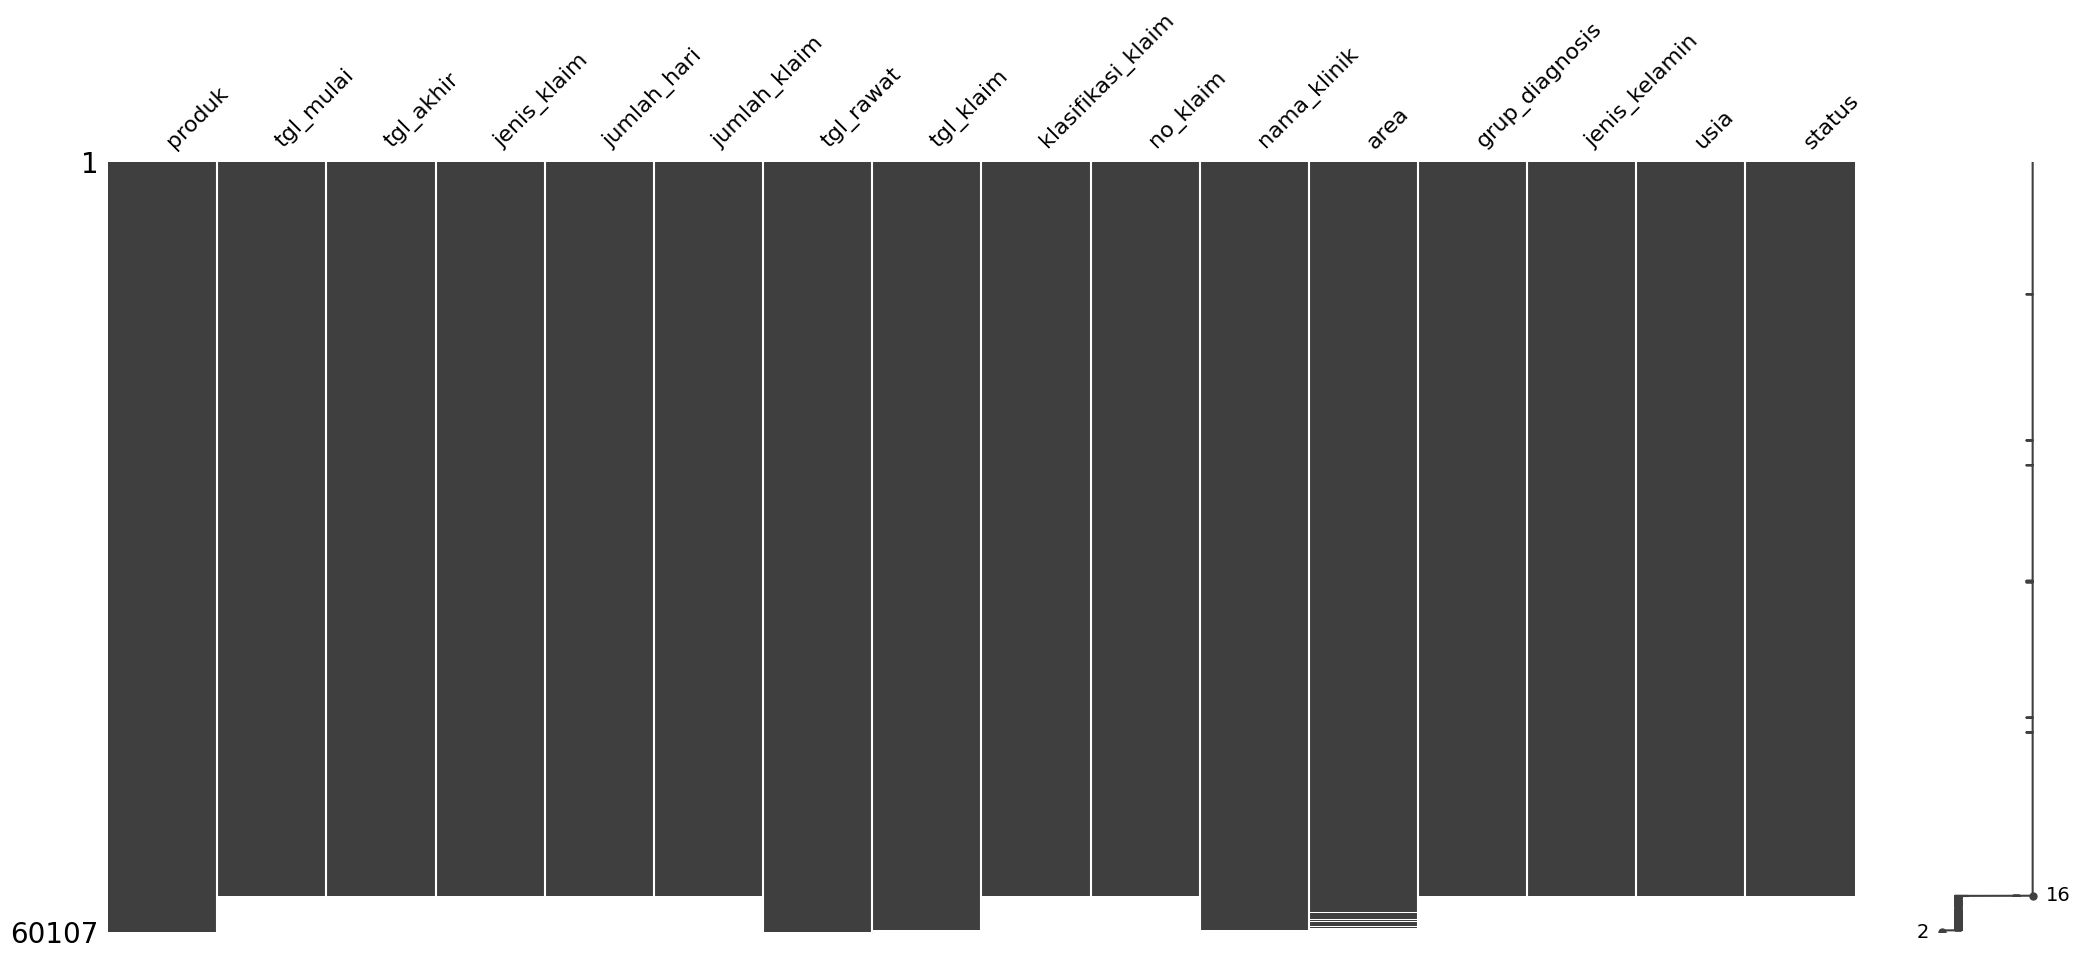

In [ ]:
# Missing value matrix
missing_value_matrix = msno.matrix(df_clean)
print(missing_value_matrix)

In [ ]:

df_clean = df_clean.dropna()

In [ ]:
df = df_clean.copy()

## Descriptive Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57265 entries, 0 to 57301
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   produk             57265 non-null  object        
 1   tgl_mulai          57265 non-null  datetime64[ns]
 2   tgl_akhir          57265 non-null  datetime64[ns]
 3   jenis_klaim        57265 non-null  object        
 4   jumlah_hari        57265 non-null  float64       
 5   jumlah_klaim       57265 non-null  float64       
 6   tgl_rawat          57265 non-null  datetime64[ns]
 7   tgl_klaim          57265 non-null  datetime64[ns]
 8   klasifikasi_klaim  57265 non-null  object        
 9   no_klaim           57265 non-null  object        
 10  nama_klinik        57265 non-null  object        
 11  area               57265 non-null  object        
 12  grup_diagnosis     57265 non-null  object        
 13  jenis_kelamin      57265 non-null  object        
 14  usia  

In [ ]:
# Convert tgl_rawat & tgl_klaim to datetime
date_col = ['tgl_rawat','tgl_klaim']
df[date_col] = df[date_col].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57265 entries, 0 to 57301
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   produk             57265 non-null  object        
 1   tgl_mulai          57265 non-null  datetime64[ns]
 2   tgl_akhir          57265 non-null  datetime64[ns]
 3   jenis_klaim        57265 non-null  object        
 4   jumlah_hari        57265 non-null  float64       
 5   jumlah_klaim       57265 non-null  float64       
 6   tgl_rawat          57265 non-null  datetime64[ns]
 7   tgl_klaim          57265 non-null  datetime64[ns]
 8   klasifikasi_klaim  57265 non-null  object        
 9   no_klaim           57265 non-null  object        
 10  nama_klinik        57265 non-null  object        
 11  area               57265 non-null  object        
 12  grup_diagnosis     57265 non-null  object        
 13  jenis_kelamin      57265 non-null  object        
 14  usia  

In [ ]:
pd.DataFrame.describe(df)

,jumlah_hari,jumlah_klaim,usia
count,57265.000000,5.726500e+04,57265.000000
mean,0.412311,5.199065e+05,30.108356
std,0.999266,2.357410e+06,17.313022
min,0.000000,7.000000e+02,0.000000
25%,0.000000,6.000000e+04,16.000000
50%,0.000000,1.645000e+05,32.000000
75%,1.000000,3.850000e+05,43.000000
max,30.000000,1.636771e+08,121.000000


In [ ]:
pd.DataFrame.describe(df, include='object')

,produk,jenis_klaim,klasifikasi_klaim,no_klaim,nama_klinik,area,grup_diagnosis,jenis_kelamin,status
count,57265,57265,57265,57265,57265,57265,57265,57265,57265
unique,3,7,3,30278,1939,32,21,2,2
top,B,RJ,REGULER,99648747,RS Premier Jatinegara (Mitra International),DKI JAKARTA,X,P,DITERIMA
freq,53004,45463,54747,8,1742,20003,9444,29057,52610


Class Count

In [ ]:
class_counts = df['status'].value_counts()
print(class_counts)

DITERIMA    52610
DITOLAK      4655
Name: status, dtype: int64


Count plot

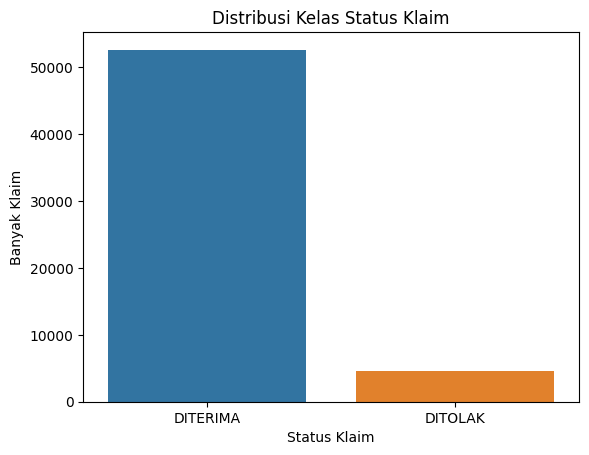

In [ ]:
sns.countplot(x='status', data=df)

plt.title("Distribusi Kelas Status Klaim")
plt.xlabel("Status Klaim")
plt.ylabel("Banyak Klaim")

plt.show()

## Preprocessing


### Feature Engineering

#### Add report lag & policy duration

In [ ]:
df['report_lag'] = df['tgl_klaim'] - df['tgl_rawat']
df['report_lag'] = df['report_lag'].dt.days

In [ ]:
df['pol_duration'] = df['tgl_klaim'] - df['tgl_mulai']
df['pol_duration'] = df['pol_duration'].dt.days

In [ ]:
print(df.head())

  produk  tgl_mulai  tgl_akhir jenis_klaim  jumlah_hari  jumlah_klaim  \
0      B 2020-04-01 2021-03-31          RL          0.0     3860796.0   
1      B 2019-10-14 2020-10-12          RI          3.0     3000000.0   
2      B 2019-10-14 2020-10-12          RI          0.0     1085142.0   
3      B 2019-10-14 2020-10-12          RI          3.0      655000.0   
4      B 2019-06-01 2020-05-30          RI          4.0     2348500.0   

   tgl_rawat  tgl_klaim klasifikasi_klaim  no_klaim  \
0 2020-01-05 2021-01-04           REGULER  89659500   
1 2020-04-17 2021-01-14           REGULER  92900206   
2 2020-04-17 2021-01-14           REGULER  92900206   
3 2020-04-17 2021-01-14           REGULER  92900206   
4 2020-05-13 2021-01-14           REGULER  93277946   

                                       nama_klinik              area  \
0                         RS Muhammadiyah Lamongan        JAWA TIMUR   
1                               RS Bunda Palembang  SUMATERA SELATAN   
2             

#### Drop Unused Columns

In [ ]:
df = df.drop(['tgl_rawat', 'tgl_klaim', 'tgl_mulai', 'tgl_akhir'], axis=1)
print(df)

      produk jenis_klaim  jumlah_hari  jumlah_klaim klasifikasi_klaim  \
0          B          RL          0.0     3860796.0           REGULER   
1          B          RI          3.0     3000000.0           REGULER   
2          B          RI          0.0     1085142.0           REGULER   
3          B          RI          3.0      655000.0           REGULER   
4          B          RI          4.0     2348500.0           REGULER   
...      ...         ...          ...           ...               ...   
57297      B          RI          0.0      242000.0           REGULER   
57298      B          RI          0.0      150000.0           REGULER   
57299      C          RI         16.0    16000000.0           REGULER   
57300      A          RJ          0.0      125000.0           REGULER   
57301      B          RJ          0.0      475000.0           REGULER   

           no_klaim                                      nama_klinik  \
0          89659500                         RS Muha

#### OHE

In [ ]:
cat_column = ['jenis_klaim','klasifikasi_klaim','area','grup_diagnosis',
              'jenis_kelamin','produk','status']
df_OHE = pd.get_dummies(df, columns= cat_column)
print(df_OHE)

       jumlah_hari  jumlah_klaim      no_klaim  \
0              0.0     3860796.0      89659500   
1              3.0     3000000.0      92900206   
2              0.0     1085142.0      92900206   
3              3.0      655000.0      92900206   
4              4.0     2348500.0      93277946   
...            ...           ...           ...   
57297          0.0      242000.0  21/06/R04229   
57298          0.0      150000.0  21/06/R04377   
57299         16.0    16000000.0  21/06/R05027   
57300          0.0      125000.0  21/06/R04227   
57301          0.0      475000.0  21/06/R04378   

                                           nama_klinik  usia  report_lag  \
0                             RS Muhammadiyah Lamongan  31.0         365   
1                                   RS Bunda Palembang  25.0         272   
2                                   RS Bunda Palembang  25.0         272   
3                                   RS Bunda Palembang  25.0         272   
4      RS Royal Pro

In [ ]:
df_OHE.drop(['status_DITERIMA'], axis=1, inplace=True)
df_OHE.rename(columns = {'status_DITOLAK':'status'}, inplace = True)

df_OHE.drop(['jenis_kelamin_P'], axis=1, inplace=True)
df_OHE.rename(columns = {'jenis_kelamin_L':'jenis_kelamin'}, inplace = True)

In [ ]:
df = df_OHE
print(df)

       jumlah_hari  jumlah_klaim      no_klaim  \
0              0.0     3860796.0      89659500   
1              3.0     3000000.0      92900206   
2              0.0     1085142.0      92900206   
3              3.0      655000.0      92900206   
4              4.0     2348500.0      93277946   
...            ...           ...           ...   
57297          0.0      242000.0  21/06/R04229   
57298          0.0      150000.0  21/06/R04377   
57299         16.0    16000000.0  21/06/R05027   
57300          0.0      125000.0  21/06/R04227   
57301          0.0      475000.0  21/06/R04378   

                                           nama_klinik  usia  report_lag  \
0                             RS Muhammadiyah Lamongan  31.0         365   
1                                   RS Bunda Palembang  25.0         272   
2                                   RS Bunda Palembang  25.0         272   
3                                   RS Bunda Palembang  25.0         272   
4      RS Royal Pro

### Split dataset into training and testing set

In [ ]:
y = df['status']
train_set, test_set = train_test_split(df, test_size=0.2, train_size=0.8, random_state=11, stratify= y)

### Normalization

In [ ]:
def z_score(data, num_columns):
    df_standardized = data.copy()

    for col in num_columns:
        df_standardized[col] = (df_standardized[col] - df_standardized[col].mean())/df_standardized[col].std()

    return df_standardized

In [ ]:
num_col = ['pol_duration','report_lag','jumlah_klaim','usia']
df_norm = z_score(df, num_col)

#normalize train set
train_norm = z_score(train_set, num_col)

# normalize test set
test_norm = z_score(test_set, num_col)

In [ ]:
# Training and Validation Set
x_train = train_norm.drop(['status','no_klaim'], axis=1)
y_train = train_norm['status']

# Testing Set
x_test = test_norm.drop(['status','no_klaim'], axis=1)
y_test = test_norm['status']

### Clustering Clinics

using k-means with relative freq

#### Training

In [ ]:
clinics_train = x_train['nama_klinik']

# Calculate relative frequencies
clinic_frequencies = clinics_train.value_counts(normalize=True)

# Create df with relative frequencies
relative_frequencies = pd.DataFrame({
    'nama_klinik': clinic_frequencies.index,
    'relative_frequency': clinic_frequencies.values
})
clinics_train = pd.merge(clinics_train, relative_frequencies, on='nama_klinik', how='left')
print(clinics_train)

                                    nama_klinik  Relative_Frequency
0                     RS Mitra Keluarga Bintaro            0.003143
1               RS Jakarta Medical Center (JMC)            0.004649
2                       RSU Surya Husadha Ubung            0.000458
3                                   RSIA Sentul            0.000808
4      RS Katolik ST. Vincentius A. Paulo (RKZ)            0.002794
...                                         ...                 ...
45807             RSM Jakarta Eye Center Kedoya            0.001506
45808                                RS Chevani            0.001201
45809                        RSIA Bunda Jakarta            0.010063
45810                                  RS Darmo            0.001528
45811                        RS Awal Bros Batam            0.007007

[45812 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

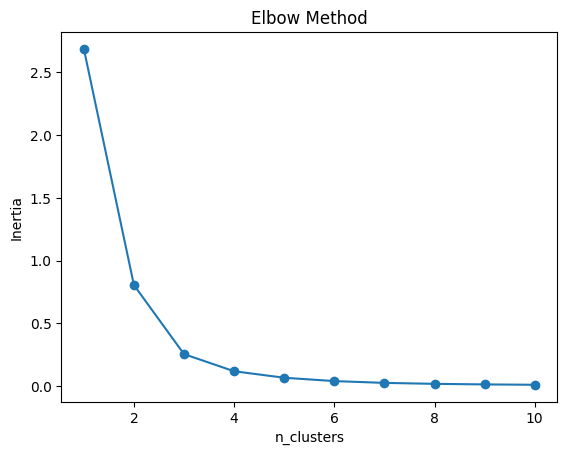

In [ ]:
# Find the optimum n_clusters with elbow method
inertia = []
max_clusters = 10

for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(clinics_train[['relative_frequency']])
    inertia.append(kmeans.inertia_)

# Plotting the inertia against number of clusters
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
# K-means clustering with the optimal n_clusters
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans_clusters=kmeans.fit(clinics_train[['relative_frequency']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clinics_train['Cluster_Label'] = kmeans.labels_

# Save the clustered df to excel
clinics_train.to_excel('clinic_clusters_relativefreq_kmeans_train2.xlsx', index=False)

In [ ]:
# Map label
clinics_train['Cluster_Label'] = clinics_train['Cluster_Label'].map({
    0: 'jarang', # low occurence
    1: 'menengah', # moderate occurence
    2: 'umum' # high occurence
})

In [ ]:
# Add the cluster label to original df
x_train_clustered = x_train
x_train_clustered = x_train_clustered.reset_index(drop=True)

In [ ]:
x_train_clustered['klaster_klinik']= clinics_train['Cluster_Label']

In [ ]:
print(x_train_clustered)

       jumlah_hari  jumlah_klaim                               nama_klinik  \
0              1.0     -0.074194                 RS Mitra Keluarga Bintaro   
1              0.0     -0.056166           RS Jakarta Medical Center (JMC)   
2              0.0     -0.148428                   RSU Surya Husadha Ubung   
3              0.0     -0.189915                               RSIA Sentul   
4              1.0     -0.178122  RS Katolik ST. Vincentius A. Paulo (RKZ)   
...            ...           ...                                       ...   
45807          1.0      0.044580             RSM Jakarta Eye Center Kedoya   
45808          1.0     -0.156912                                RS Chevani   
45809          0.0     -0.180243                        RSIA Bunda Jakarta   
45810          0.0     -0.186606                                  RS Darmo   
45811          0.0     -0.207816                        RS Awal Bros Batam   

           usia  report_lag  pol_duration  jenis_klaim_KB  jeni

#### Testing

In [ ]:
clinics_test = x_test['nama_klinik']

# Calculate relative frequencies
clinic_frequencies = clinics_test.value_counts(normalize=True)

# Create df with relative frequencies
relative_frequencies = pd.DataFrame({
    'nama_klinik': clinic_frequencies.index,
    'relative_frequency': clinic_frequencies.values
})
clinics_test = pd.merge(clinics_test, relative_frequencies, on='nama_klinik', how='left')
print(clinics_test)

                                       nama_klinik  Relative_Frequency
0                              RS Grha Permata Ibu            0.001048
1                                  RS Islam Klaten            0.000699
2                         RS Siloam Hospitals Asri            0.000699
3                 RS Mayapada Hospital Lebak Bulus            0.002445
4                        Klinik Mitra Medika Abadi            0.016677
...                                            ...                 ...
11448                           RS Awal Bros Batam            0.007596
11449                          RS Sari Asih Serang            0.003056
11450  RS Premier Jatinegara (Mitra International)            0.029774
11451                                      RS Azra            0.008469
11452                       RS Harapan Bunda Batam            0.004540

[11453 rows x 2 columns]


In [ ]:
# Predict the clusters
clinics_test['Cluster_Label'] = kmeans.predict(clinics_test[['relative_frequency']])
clinics_test.to_excel('clinic_clusters_relativefreq_kmeans_test.xlsx', index=False)

In [ ]:
# Map label
clinics_test['Cluster_Label'] = clinics_test['Cluster_Label'].map({
    0: 'jarang', # low occurence
    1: 'menengah', # moderate occurence
    2: 'umum' # high occurence
})

In [ ]:
# Add the cluster label to original testing set
x_test_clustered = x_test
x_test_clustered = x_test_clustered.reset_index(drop=True)

In [ ]:
x_test_clustered['klaster_klinik']= clinics_test['Cluster_Label']

In [ ]:
print(x_test_clustered['klaster_klinik'])

0        menengah
1        menengah
2        menengah
3        menengah
4          jarang
           ...   
11448      jarang
11449    menengah
11450        umum
11451      jarang
11452    menengah
Name: klaster_klinik, Length: 11453, dtype: object


### Drop nama_klinik and perform OHE on klaster_klinik

####train set

In [ ]:
x_train = x_train_clustered

In [ ]:
x_train = x_train.drop(['nama_klinik'], axis=1)

In [ ]:
x_train = pd.get_dummies(x_train, columns=['klaster_klinik'])

#### test set

In [ ]:
x_test = x_test_clustered
x_test = x_test.drop(['nama_klinik'], axis=1)
x_test = pd.get_dummies(x_test, columns=['klaster_klinik'])

### SMOTE

Train set before SMOTE

In [ ]:
# Kelas positif
positive_train = len(train_norm[train_norm['status']==1])
print('jumlah kelas positif: ', positive_train)

# Kelas negatif
negative_train = len(train_norm[train_norm['status']==0])
print('jumlah kelas negatif: ', negative_train)

jumlah kelas positif:  3724
jumlah kelas negatif:  42088


Apply SMOTE only on train set

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=11)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

Train set after SMOTE

In [ ]:
# Kelas positif
positive_train_smote = len(y_train_smote==1)
print('jumlah kelas positif setelah smote: ', positive_train_smote)

# Kelas negatif
negative_train_smote = len(y_train_smote==0)
print('jumlah kelas negatif setelah smote: ', negative_train_smote)

jumlah kelas positif setelah smote:  84176
jumlah kelas negatif setelah smote:  84176


# Model Making

## Function

In [ ]:
class ModelMaking:
  def __init__(self, model):
    self.model = model

  def train_model(self, feature, label, k_fold, k):

    # Metrics list
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    f2_scores = []
    mcc_scores = []
    auc_scores = []

    # True and predicted label list
    y_true_all = []
    y_pred_all = []

    # Cross validation looping
    for train, val in skf.split(feature, label):

        # Split training and validation set
        x_train, y_train = feature.iloc[train], label.iloc[train]
        x_val, y_val = feature.iloc[val], label.iloc[val]

        # Fit the model on training set
        self.model.fit(x_train, y_train)

        # Predict with validation set
        y_pred = self.model.predict(x_val)

        # Accumulate true and predicted label
        y_true_all.extend(y_val)
        y_pred_all.extend(y_pred)

        # Evaluation metrics
        # Accuracy
        accuracy = accuracy_score(y_val, y_pred)
        accuracy_scores.append(accuracy)

        ## Precision
        precision = precision_score(y_val, y_pred)
        precision_scores.append(precision)

        ## Recall
        recall = recall_score(y_val, y_pred)
        recall_scores.append(recall)

        ## F1-score
        f1 = f1_score(y_val, y_pred)
        f1_scores.append(f1)

        ## F2-score
        f2 = fbeta_score(y_val, y_pred, beta=2)
        f2_scores.append(f2)

        ## MCC score
        mcc = matthews_corrcoef(y_val, y_pred)
        mcc_scores.append(mcc)

        ## ROC-AUC
        auc = roc_auc_score(y_val, y_pred)
        auc_scores.append(auc)

    # Confusion matrix
    cm_train = confusion_matrix(y_true_all, y_pred_all)
    cm_train = cm_train[:, ::-1][::-1, :]

    ## Define the labels for the x-axis and y-axis
    labels = ['Ditolak', 'Diterima']

    ## Heatmap
    sns.heatmap(cm_train, annot=True, cmap='YlGnBu', fmt='.2f', xticklabels=labels, yticklabels=labels)

    ## Add labels, title, and ticks
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Training Confusion Matrix')

    ## Plot heatmap
    plt.show()

    return {
        'Train Accuracy'          : np.mean(accuracy_scores),
        'Train Precision'         : np.mean(precision_scores),
        'Train Recall'            : np.mean(recall_scores),
        'Train F1-Score'          : np.mean(f1_scores),
        'Train F2-Score'          : np.mean(f2_scores),
        'Train AUC'               : np.mean(auc_scores),
        'Train MCC  '             : np.mean(mcc_scores)
    }

  def test_model(self, feature, label):
    # Predict with testing set
    y_pred_test = self.model.predict(feature)

    # Confusion matrix
    cm_test = confusion_matrix(label, y_pred_test)
    cm_test = cm_test[:, ::-1][::-1, :]

    ## Define the labels for the x-axis and y-axis
    labels = ['Ditolak', 'Diterima']

    ## Heatmap
    sns.heatmap(cm_test, annot=True, cmap='YlGnBu', fmt='.2f', xticklabels=labels, yticklabels=labels)

    ## Add labels, title, and ticks
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title('Testing Confusion Matrix')

    ## Plot heatmap
    plt.show()

    # Evaluation metrics
    accuracy = accuracy_score(label, y_pred_test)
    precision = precision_score(label, y_pred_test)
    recall = recall_score(label, y_pred_test)
    f1 = f1_score(label, y_pred_test)
    f2 = fbeta_score(label, y_pred_test, beta=2)
    mcc = matthews_corrcoef(label, y_pred_test)
    auc = roc_auc_score(label, y_pred_test)

    return{
        'Test Accuracy'         : accuracy,
        'Test Precision'        : precision,
        'Test Recall'           : recall,
        'Test F1-Score'         : f1,
        'Test F2-Score'         : f2,
        'Test AUC-ROC'          : auc,
        'Test MCC Score'        : mcc

    }

  def print_metrics(self, result, name):
    print(f'\n{name} metrics \n')
    for metric, score in result.items():
      print(metric,': \n', score, '\n')

## Decision Tree

### Hyperparameter Tuning

In [ ]:
model = DecisionTreeClassifier(random_state=11)

params_dtc = {'max_depth'         : [None, 2,3,4,5],
              'min_samples_leaf'  : [1, 10, 20],
              'max_features'      : [None, 'sqrt', 'log2']
              }

k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
tuning_dtc = RandomizedSearchCV(model, params_dtc, cv=cv, scoring='f1',
                                n_iter=20, random_state=11, verbose=3)

tuning_dtc.fit(x_train_smote, y_train_smote)

# Result
best_params = tuning_dtc.best_params_
best_model = tuning_dtc.best_estimator_

print(best_params)
print(best_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=4, max_features=sqrt, min_samples_leaf=10;, score=0.606 total time=   0.1s
[CV 2/5] END max_depth=4, max_features=sqrt, min_samples_leaf=10;, score=0.615 total time=   0.1s
[CV 3/5] END max_depth=4, max_features=sqrt, min_samples_leaf=10;, score=0.597 total time=   0.1s
[CV 4/5] END max_depth=4, max_features=sqrt, min_samples_leaf=10;, score=0.598 total time=   0.1s
[CV 5/5] END max_depth=4, max_features=sqrt, min_samples_leaf=10;, score=0.614 total time=   0.1s
[CV 1/5] END max_depth=4, max_features=None, min_samples_leaf=20;, score=0.747 total time=   0.3s
[CV 2/5] END max_depth=4, max_features=None, min_samples_leaf=20;, score=0.757 total time=   0.3s
[CV 3/5] END max_depth=4, max_features=None, min_samples_leaf=20;, score=0.747 total time=   0.3s
[CV 4/5] END max_depth=4, max_features=None, min_samples_leaf=20;, score=0.751 total time=   0.3s
[CV 5/5] END max_depth=4, max_features=None, min_samples

In [ ]:
dtc_results = pd.DataFrame(tuning_dtc.cv_results_)
dtc_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,1.089649,0.015426,0.017161,0.001414,1,None,None,"{'min_samples_leaf': 1, 'max_features': None, ...",0.928361,0.922878,0.924454,0.922463,0.926458,0.924923,0.002220,1
4,0.256011,0.017030,0.021856,0.001074,20,log2,None,"{'min_samples_leaf': 20, 'max_features': 'log2...",0.822815,0.823913,0.800511,0.822711,0.822012,0.818393,0.008961,2
18,0.509630,0.084619,0.018292,0.002394,1,None,5,"{'min_samples_leaf': 1, 'max_features': None, ...",0.807466,0.810069,0.806295,0.805744,0.806298,0.807174,0.001552,3
2,0.373731,0.006024,0.014156,0.002272,20,None,5,"{'min_samples_leaf': 20, 'max_features': None,...",0.807098,0.809616,0.805451,0.805153,0.806166,0.806697,0.001606,4
14,0.104488,0.005127,0.013007,0.000469,20,log2,5,"{'min_samples_leaf': 20, 'max_features': 'log2...",0.754646,0.754212,0.753179,0.759551,0.750885,0.754495,0.002843,5
8,0.159264,0.005728,0.019388,0.000739,1,log2,5,"{'min_samples_leaf': 1, 'max_features': 'log2'...",0.752863,0.754620,0.753845,0.759627,0.750900,0.754371,0.002908,6
6,0.160739,0.005584,0.019143,0.000361,10,log2,5,"{'min_samples_leaf': 10, 'max_features': 'log2...",0.752863,0.754578,0.753593,0.759589,0.750900,0.754304,0.002904,7
15,0.079022,0.004132,0.013632,0.000935,10,sqrt,3,"{'min_samples_leaf': 10, 'max_features': 'sqrt...",0.753941,0.755211,0.748177,0.751675,0.754336,0.752668,0.002531,8
1,0.318498,0.010665,0.013268,0.000611,20,None,4,"{'min_samples_leaf': 20, 'max_features': None,...",0.746710,0.756907,0.746959,0.750633,0.755831,0.751408,0.004296,9
11,0.228694,0.044681,0.015675,0.003331,1,None,2,"{'min_samples_leaf': 1, 'max_features': None, ...",0.739580,0.738426,0.735778,0.739206,0.738844,0.738367,0.001350,10


### Train & Test

In [ ]:
#Model
dtc = DecisionTreeClassifier(random_state=11)

model_dtc = ModelMaking(dtc)

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

#### Train

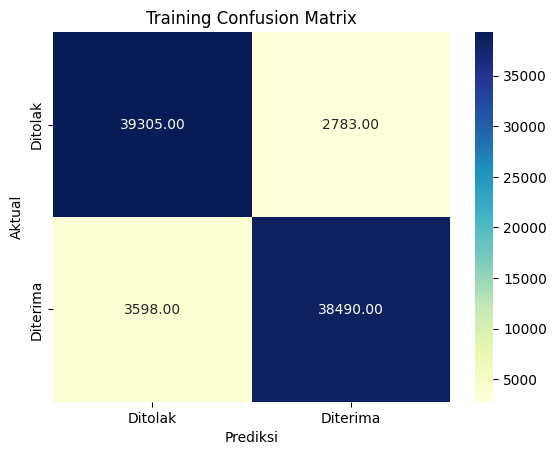


Training metrics 

Train Accuracy : 
 0.9241945036528072 

Train Precision : 
 0.9161423143269776 

Train Recall : 
 0.933876563549998 

Train F1-Score : 
 0.9249228764482884 

Train F2-Score : 
 0.930273981164558 

Train AUC : 
 0.924194488617248 

Train MCC   : 
 0.8485509658720378 



In [ ]:
# Train Model
trained_model = model_dtc.train_model(x_train_smote, y_train_smote, skf, k)

# Print training result
model_dtc.print_metrics(trained_model, 'Training')

#### Test

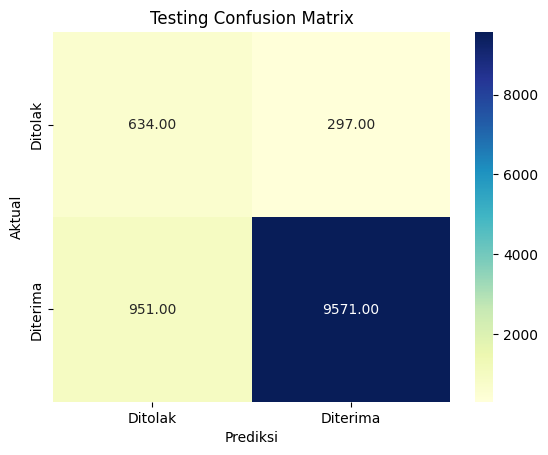


Testing metrics 

Test Accuracy : 
 0.8910329171396141 

Test Precision : 
 0.4 

Test Recall : 
 0.6809881847475833 

Test F1-Score : 
 0.5039745627980923 

Test F2-Score : 
 0.5970992653983801 

Test AUC-ROC : 
 0.7953030640521797 

Test MCC Score : 
 0.46740433329504844 



In [ ]:
# Test Model
test_model = model_dtc.test_model(x_test, y_test)

# Print test metrics
model_dtc.print_metrics(test_model, 'Testing')

## Random Forest

### Hyperparameter Tuning

In [ ]:
model = RandomForestClassifier(random_state=11)

params_rfc = {'n_estimators'      : [10, 50, 100, 300],
              'max_depth'         : [None, 2, 3, 5],
              'min_samples_leaf'  : [1, 5, 10],
              'max_features'      : ['sqrt', 'log2']
              }

k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
tuning_rfc = RandomizedSearchCV(model, params_rfc, cv=cv, scoring='f1', n_iter=20, verbose=3)

tuning_rfc.fit(x_train_smote, y_train_smote)

best_params = tuning_rfc.best_params_
best_model = tuning_rfc.best_estimator_

print(best_params)
print(best_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=2, max_features=log2, min_samples_leaf=10, n_estimators=250;, score=0.796 total time=   5.2s
[CV 2/5] END max_depth=2, max_features=log2, min_samples_leaf=10, n_estimators=250;, score=0.799 total time=   5.5s
[CV 3/5] END max_depth=2, max_features=log2, min_samples_leaf=10, n_estimators=250;, score=0.794 total time=   4.6s
[CV 4/5] END max_depth=2, max_features=log2, min_samples_leaf=10, n_estimators=250;, score=0.796 total time=   5.6s
[CV 5/5] END max_depth=2, max_features=log2, min_samples_leaf=10, n_estimators=250;, score=0.796 total time=   4.0s
[CV 1/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.789 total time=   1.8s
[CV 2/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.802 total time=   1.8s
[CV 3/5] END max_depth=2, max_features=sqrt, min_samples_leaf=1, n_estimators=100;, score=0.785 total time=   1.8s
[CV 4/5] END 

In [ ]:
rfc_results = pd.DataFrame(tuning_rfc.cv_results_)
rfc_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_leaf,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,26.451204,0.882875,0.922013,0.127605,250,5,sqrt,None,"{'n_estimators': 250, 'min_samples_leaf': 5, '...",0.912725,0.913298,0.908289,0.905974,0.911407,0.910339,0.002787,1
4,10.513543,0.601189,0.404089,0.078052,100,5,sqrt,None,"{'n_estimators': 100, 'min_samples_leaf': 5, '...",0.911732,0.913291,0.909048,0.906984,0.910544,0.910320,0.002173,2
6,21.044973,0.367492,0.920173,0.164466,250,5,log2,None,"{'n_estimators': 250, 'min_samples_leaf': 5, '...",0.902533,0.905696,0.900082,0.897766,0.903479,0.901911,0.002746,3
9,0.896283,0.138756,0.048197,0.007788,10,5,log2,None,"{'n_estimators': 10, 'min_samples_leaf': 5, 'm...",0.898223,0.898329,0.895031,0.893111,0.896624,0.896263,0.001985,4
10,7.860289,0.919894,0.334144,0.050523,100,10,log2,None,"{'n_estimators': 100, 'min_samples_leaf': 10, ...",0.886568,0.887454,0.882492,0.882725,0.883997,0.884647,0.002016,5
2,8.742977,1.015366,0.341278,0.040775,250,5,sqrt,5,"{'n_estimators': 250, 'min_samples_leaf': 5, '...",0.820528,0.820722,0.816638,0.817767,0.821907,0.819512,0.001977,6
12,8.851386,0.752866,0.330008,0.051622,250,10,sqrt,5,"{'n_estimators': 250, 'min_samples_leaf': 10, ...",0.818642,0.820414,0.816808,0.816111,0.821481,0.818691,0.002047,7
13,3.565706,0.525797,0.151678,0.022345,100,1,sqrt,5,"{'n_estimators': 100, 'min_samples_leaf': 1, '...",0.816505,0.820115,0.812387,0.814688,0.821114,0.816962,0.003271,8
8,1.388088,0.111755,0.071478,0.002015,50,1,log2,5,"{'n_estimators': 50, 'min_samples_leaf': 1, 'm...",0.801901,0.817591,0.804469,0.809691,0.817543,0.810239,0.006489,9
18,6.224070,0.829354,0.297050,0.046283,250,5,sqrt,3,"{'n_estimators': 250, 'min_samples_leaf': 5, '...",0.805091,0.809401,0.803442,0.803251,0.809483,0.806134,0.002776,10


### Train & Test

In [ ]:
#Model
rfc = RandomForestClassifier(n_estimators=10, max_features='sqrt', random_state=11)

model_rfc = ModelMaking(rfc)

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

#### Train

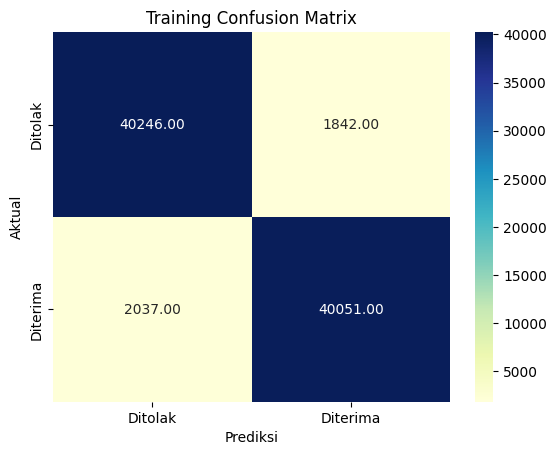


Training metrics 

Train Accuracy : 
 0.9539179730198974 

Train Precision : 
 0.9518259483774472 

Train Recall : 
 0.9562345328736971 

Train F1-Score : 
 0.9540229024369561 

Train F2-Score : 
 0.9553481094921688 

Train AUC : 
 0.9539179806517335 

Train MCC   : 
 0.9078500243228902 



In [ ]:
# Train Model
trained_model = model_rfc.train_model(x_train_smote, y_train_smote, skf, k)

# Print training result
model_rfc.print_metrics(trained_model, 'Training')

#### Test

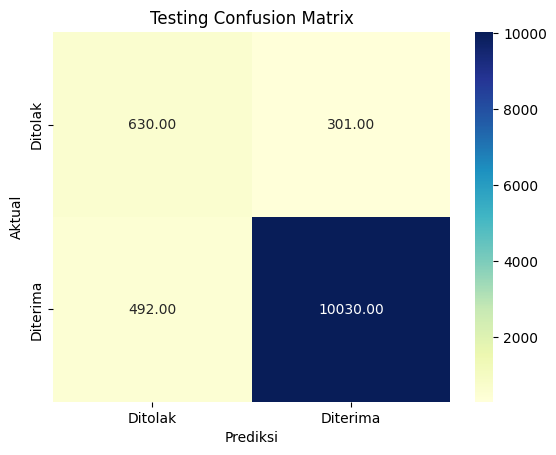


Testing metrics 

Test Accuracy : 
 0.9307604994324631 

Test Precision : 
 0.5614973262032086 

Test Recall : 
 0.6766917293233082 

Test F1-Score : 
 0.6137359961032635 

Test F2-Score : 
 0.6500206355757325 

Test AUC-ROC : 
 0.8149662790315458 

Test MCC Score : 
 0.5790958270481512 



In [ ]:
# Test Model
tested_model = model_rfc.test_model(x_test, y_test)

# Print test metrics
model_rfc.print_metrics(tested_model, 'Testing')

### Feature Importance

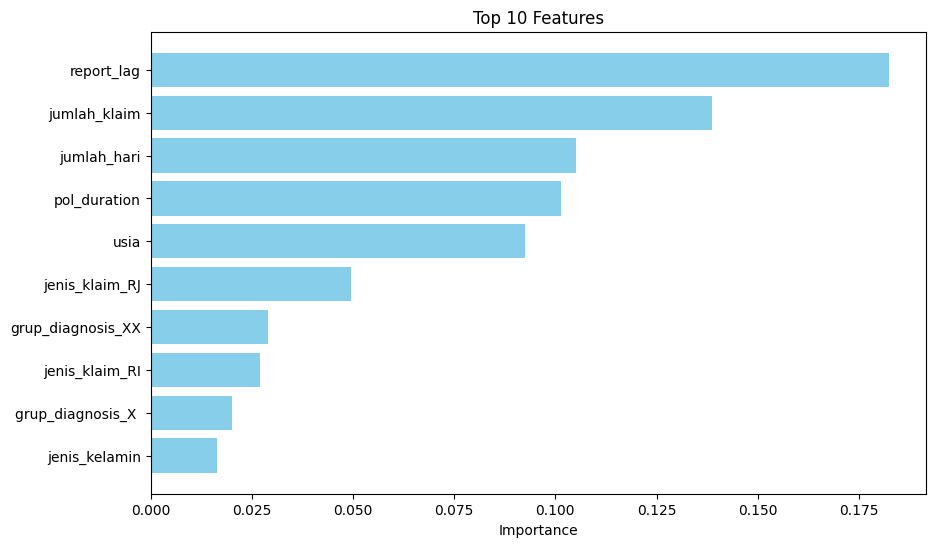

In [ ]:
# Get feature importances
importances = rfc.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_test.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importances['Feature'][:10]
top_10_importances = feature_importances['Importance'][:10]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

### Probs

In [ ]:
claimno_test = test_set['no_klaim']
predicted_classes = rfc.predict(x_test)
probabilities = rfc.predict_proba(x_test)[:, 1]


probs = {'Nomor Klaim': claimno_test[:30],
        'Actual Class': y_test[:30],
        'Predicted Class': predicted_classes[:30],
        'Predicted Probability': probabilities[:30]}
probs_df = pd.DataFrame(probs)

print(probs_df.to_csv(index=False, sep='\t'))

Nomor Klaim	Actual Class	Predicted Class	Predicted Probability
100606979	0	0	0.1
98826459	0	0	0.0
98466060	0	1	0.9
97923071	0	0	0.4
100357056	0	0	0.1
97621506	0	0	0.0
21/03/P03260	0	0	0.3
99436896	0	0	0.0
99022348	0	1	0.6
99683803	0	0	0.0
97797406	0	0	0.0
100198697	0	1	0.6
98721881	0	0	0.0
97806747	0	0	0.0
99791065	0	0	0.0
21/05/P05531	1	1	0.6
21/04/R00975	0	1	0.6
101566083	0	0	0.1
99744623	0	0	0.0
21/04/R00901	0	0	0.2
21/05/R05926	1	1	0.9
97799706	0	0	0.0
101064587	0	0	0.2
21/01/R07080	0	0	0.1
101376898	0	0	0.0
99027241	0	0	0.0
100525231	0	0	0.0
21/05/P04493	0	0	0.1
98437763	0	0	0.0
100020741	0	0	0.0



## AdaBoost

### Hyperparameter Tuning

In [ ]:
model = AdaBoostClassifier(random_state=11)

params_abc = {'n_estimators'  : [20, 50, 100, 200, 300],
              'learning_rate' : [0.001, 0.01, 0.1, 1]
              }
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
tuning_abc = RandomizedSearchCV(model, params_abc, cv=cv, scoring='f1',
                                n_iter=20, verbose=3)

tuning_abc.fit(x_train_smote, y_train_smote)

best_params = tuning_abc.best_params_
best_model = tuning_abc.best_estimator_

print(best_params)
print(best_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.001, n_estimators=20;, score=0.740 total time=   1.9s
[CV 2/5] END learning_rate=0.001, n_estimators=20;, score=0.738 total time=   1.9s
[CV 3/5] END learning_rate=0.001, n_estimators=20;, score=0.735 total time=   1.9s
[CV 4/5] END learning_rate=0.001, n_estimators=20;, score=0.739 total time=   2.7s
[CV 5/5] END learning_rate=0.001, n_estimators=20;, score=0.739 total time=   2.8s
[CV 1/5] END learning_rate=0.001, n_estimators=50;, score=0.740 total time=   5.1s
[CV 2/5] END learning_rate=0.001, n_estimators=50;, score=0.738 total time=   4.5s
[CV 3/5] END learning_rate=0.001, n_estimators=50;, score=0.735 total time=   5.9s
[CV 4/5] END learning_rate=0.001, n_estimators=50;, score=0.739 total time=   5.5s
[CV 5/5] END learning_rate=0.001, n_estimators=50;, score=0.739 total time=   4.5s
[CV 1/5] END learning_rate=0.001, n_estimators=100;, score=0.740 total time=  11.2s
[CV 2/5] END learning_ra

In [ ]:
abc_results = pd.DataFrame(tuning_abc.cv_results_)
abc_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,29.571150,0.727393,1.222118,0.220340,300,1,"{'n_estimators': 300, 'learning_rate': 1}",0.856066,0.856427,0.862036,0.857805,0.858732,0.858213,0.002138,1
18,19.786976,0.467647,0.814363,0.160004,200,1,"{'n_estimators': 200, 'learning_rate': 1}",0.849641,0.852475,0.850812,0.850651,0.849453,0.850606,0.001077,2
17,9.953532,0.868571,0.387213,0.067068,100,1,"{'n_estimators': 100, 'learning_rate': 1}",0.838196,0.841267,0.837962,0.839537,0.836544,0.838701,0.001596,3
16,5.204771,0.918241,0.220432,0.035398,50,1,"{'n_estimators': 50, 'learning_rate': 1}",0.824565,0.825088,0.824375,0.822749,0.819426,0.823241,0.002061,4
14,29.900143,0.637482,1.234208,0.237141,300,0.1,"{'n_estimators': 300, 'learning_rate': 0.1}",0.820458,0.823264,0.817038,0.821319,0.821567,0.820729,0.002058,5
13,19.728276,0.464442,0.814780,0.162146,200,0.1,"{'n_estimators': 200, 'learning_rate': 0.1}",0.814908,0.816969,0.810642,0.813837,0.814393,0.814150,0.002048,6
15,2.008098,0.338056,0.084338,0.014149,20,1,"{'n_estimators': 20, 'learning_rate': 1}",0.811316,0.803505,0.808187,0.805590,0.805050,0.806730,0.002745,7
9,29.720641,0.658019,1.235301,0.250172,300,0.01,"{'n_estimators': 300, 'learning_rate': 0.01}",0.800995,0.800951,0.798078,0.802707,0.802933,0.801133,0.001738,8
12,9.937561,0.869063,0.424898,0.083162,100,0.1,"{'n_estimators': 100, 'learning_rate': 0.1}",0.797213,0.802634,0.792248,0.801763,0.804082,0.799588,0.004330,9
11,4.864221,0.494915,0.200307,0.032405,50,0.1,"{'n_estimators': 50, 'learning_rate': 0.1}",0.799978,0.797801,0.799888,0.797420,0.800113,0.799040,0.001176,10


###Train & Test

In [ ]:
#Model
abc = AdaBoostClassifier(learning_rate=1, n_estimators=300, random_state=11)
model_abc = ModelMaking(abc)

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

#### Train

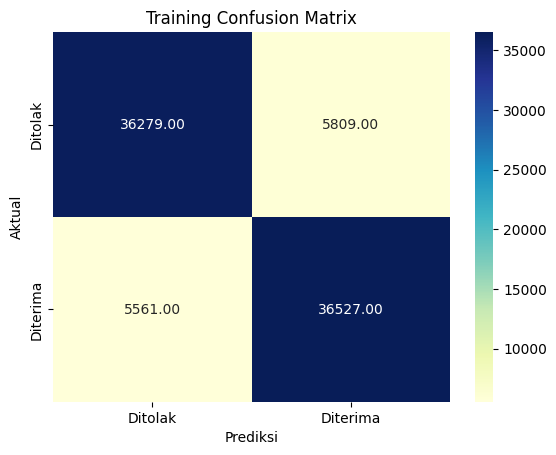


Training metrics 

Train Accuracy : 
 0.8649258963442856 

Train Precision : 
 0.8671026375618398 

Train Recall : 
 0.8619797729724429 

Train F1-Score : 
 0.8645221088801278 

Train F2-Score : 
 0.8629921675081349 

Train AUC : 
 0.8649259129007628 

Train MCC   : 
 0.7298836373769962 



In [ ]:
# Train Model
trained_model = model_abc.train_model(x_train_smote, y_train_smote, skf, k)

# Print training result
model_abc.print_metrics(trained_model, 'Training')

#### Test

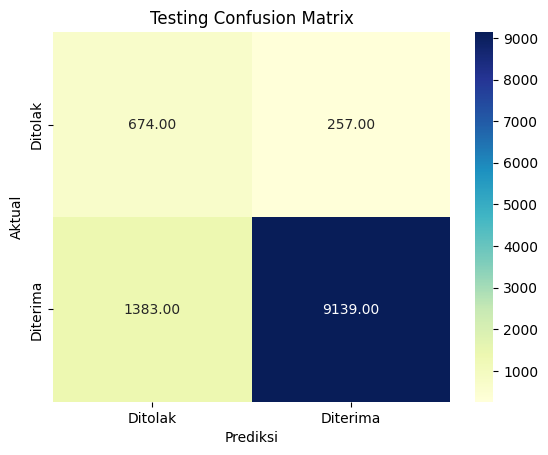


Testing metrics 

Test Accuracy : 
 0.8568060770103902 

Test Precision : 
 0.32766164316966456 

Test Recall : 
 0.723952738990333 

Test F1-Score : 
 0.45113788487282463 

Test F2-Score : 
 0.5829441273136137 

Test AUC-ROC : 
 0.7962569245227278 

Test MCC Score : 
 0.4218264859386026 



In [ ]:
# Test Model
tested_model = model_abc.test_model(x_test, y_test)

# Print test metrics
model_abc.print_metrics(tested_model, 'Testing')

### Feature Importance

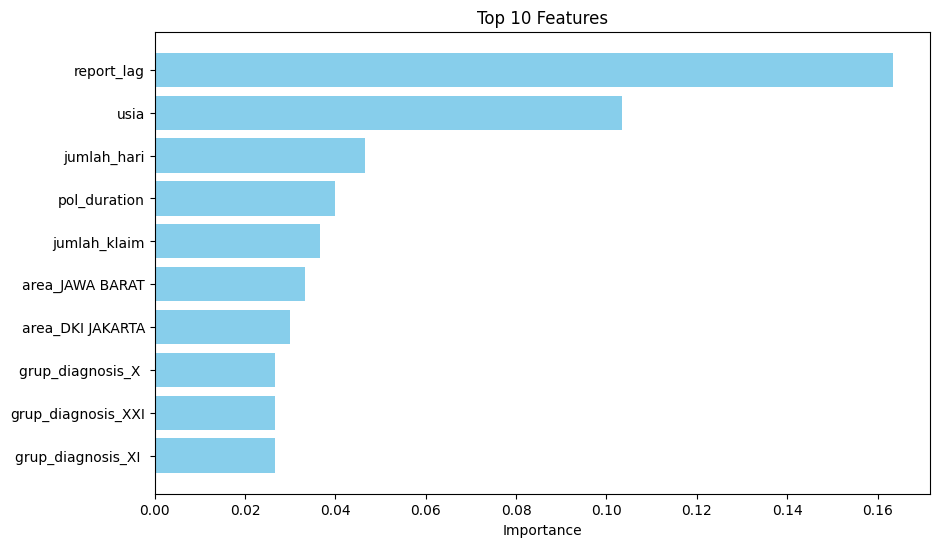

In [ ]:
# Get feature importances
importances = abc.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_test.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importances['Feature'][:10]
top_10_importances = feature_importances['Importance'][:10]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

## LogitBoost

https://logitboost.readthedocs.io/logitboost.html

### Hyperparameter tuning

In [ ]:
#model = LogitBoost(random_state=11)

#params_lbc = {'n_estimators'         : [50, 100, 200, 300],
#              'learning_rate'        : [0.001, 0.01, 0.1, 1],
#              'weight_trim_quantile' : [0.01, 0.05, 0.1]
#              }
#k = 5
#cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
#tuning_lbc = RandomizedSearchCV(model, params_lbc, cv=cv, scoring='f1',
#                                n_iter=20, verbose=3)

#tuning_lbc.fit(x_train_smote, y_train_smote)

#best_params = tuning_lbc.best_params_
#best_model = tuning_lbc.best_estimator_

#print(best_params)
#print(best_model)

In [ ]:
#lbc_results = pd.DataFrame(tuning_lbc.cv_results_)
#lbc_results.sort_values(by=['rank_test_score'])

### Train & Test

In [ ]:
#Model
lbc = LogitBoost(learning_rate=1, n_estimators=200, random_state=11)
model_lbc = ModelMaking(lbc)

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

#### Train

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names,

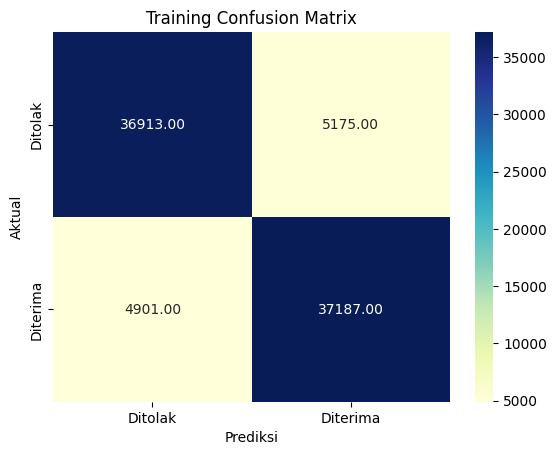

In [ ]:
# Train Model
trained_model = model_lbc.train_model(x_train_smote, y_train_smote, skf, k)

In [ ]:
# Print training result
model_lbc.print_metrics(trained_model, 'Training')


Training metrics 

Train Accuracy : 
 0.8802984249669924 

Train Precision : 
 0.8828256220106981 

Train Recall : 
 0.8770432103307879 

Train F1-Score : 
 0.8799059888729012 

Train F2-Score : 
 0.878181579749808 

Train AUC : 
 0.8802983561789457 

Train MCC   : 
 0.7606452811947477 



#### Test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

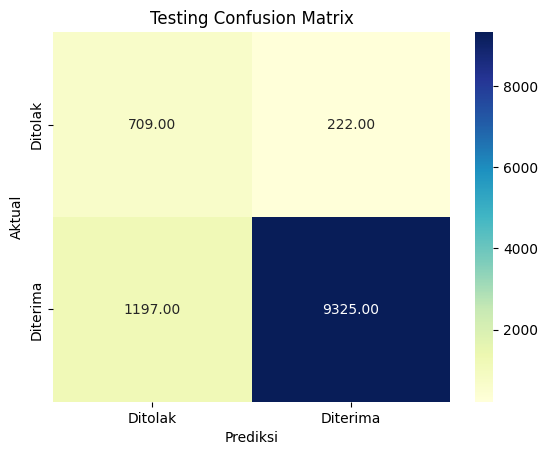


Testing metrics 

Test Accuracy : 
 0.876102331266917 

Test Precision : 
 0.3719832109129066 

Test Recall : 
 0.761546723952739 

Test F1-Score : 
 0.49982375749030666 

Test F2-Score : 
 0.6296625222024868 

Test AUC-ROC : 
 0.8238925408397035 

Test MCC Score : 
 0.47529147192186794 



In [ ]:
# Test Model
tested_model = model_lbc.test_model(x_test, y_test)
# Print test metrics
model_lbc.print_metrics(tested_model, 'Testing')

## XGBoost

### Hyperparameter Tuning

In [ ]:
model = XGBClassifier(random_state=11)

params_xgb = {
    'learning_rate'    : [0.01, 0.1, 0.3, 1],
    'max_depth'        : [6, 7, 8],
    'subsample'        : [0.5, 0.8, 1],
    'n_estimators'     : [100, 200, 300]
    }
k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

In [ ]:
# Perform hyperparameter tuning using RandomizedSearchCV
tuning_xgb = RandomizedSearchCV(model, params_xgb, cv=cv, scoring='f1',
                                n_iter=20, verbose=3)

tuning_xgb.fit(x_train_smote, y_train_smote)

best_params = tuning_xgb.best_params_
best_model = tuning_xgb.best_estimator_

print(best_params)
print(best_model)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8;, score=0.965 total time=   4.1s
[CV 2/5] END learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8;, score=0.968 total time=   8.3s
[CV 3/5] END learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8;, score=0.967 total time=   4.1s
[CV 4/5] END learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8;, score=0.967 total time=   3.9s
[CV 5/5] END learning_rate=0.3, max_depth=6, n_estimators=300, subsample=0.8;, score=0.966 total time=   8.5s
[CV 1/5] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8;, score=0.863 total time=   3.8s
[CV 2/5] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8;, score=0.861 total time=   3.8s
[CV 3/5] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8;, score=0.859 total time=   8.4s
[CV 4/5] END learning_rate=0.01, max_depth=7, n_estimat

In [ ]:
xgb_results = pd.DataFrame(tuning_xgb.cv_results_)
xgb_results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,6.083555,1.858633,0.219252,0.053809,1,300,8,0.3,"{'subsample': 1, 'n_estimators': 300, 'max_dep...",0.968305,0.971211,0.972186,0.971757,0.971232,0.970938,0.001365,1
13,5.974899,2.248097,0.162009,0.005560,0.8,300,7,0.3,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",0.967424,0.969235,0.969067,0.971381,0.969276,0.969277,0.001258,2
10,5.060594,2.130818,0.158080,0.033713,0.5,200,8,0.3,"{'subsample': 0.5, 'n_estimators': 200, 'max_d...",0.965894,0.968187,0.968002,0.969388,0.965591,0.967412,0.001448,3
17,6.737901,2.305207,0.158661,0.002382,0.8,300,7,1,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",0.965133,0.966544,0.967424,0.969977,0.966451,0.967106,0.001611,4
0,5.615281,2.113443,0.153111,0.034734,0.8,300,6,0.3,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",0.965308,0.967711,0.966895,0.967128,0.966450,0.966698,0.000805,5
9,3.729231,1.134030,0.136872,0.040545,0.8,200,7,0.3,"{'subsample': 0.8, 'n_estimators': 200, 'max_d...",0.964129,0.965341,0.964440,0.967497,0.964693,0.965220,0.001206,6
12,3.628771,1.526177,0.132296,0.037027,0.5,200,6,0.3,"{'subsample': 0.5, 'n_estimators': 200, 'max_d...",0.957745,0.959391,0.960333,0.959488,0.959357,0.959263,0.000840,7
2,2.973605,1.733268,0.103316,0.028962,0.5,100,8,1,"{'subsample': 0.5, 'n_estimators': 100, 'max_d...",0.957128,0.954158,0.955337,0.957851,0.955544,0.956004,0.001322,8
3,4.964867,2.131620,0.124503,0.033198,0.5,200,6,1,"{'subsample': 0.5, 'n_estimators': 200, 'max_d...",0.953755,0.953319,0.954449,0.957520,0.954346,0.954678,0.001479,9
18,6.251361,2.218926,0.186122,0.006251,0.8,300,8,0.1,"{'subsample': 0.8, 'n_estimators': 300, 'max_d...",0.955097,0.955240,0.952527,0.953572,0.954250,0.954137,0.001006,10


### Train & Test

In [ ]:
#Model
xgb = XGBClassifier(subsample=1, n_estimators=300, max_depth=8, learning_rate=0.3, random_state=11)
model_xgb = ModelMaking(xgb)

# Initialize Stratified K-Fold
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=11)

#### Train

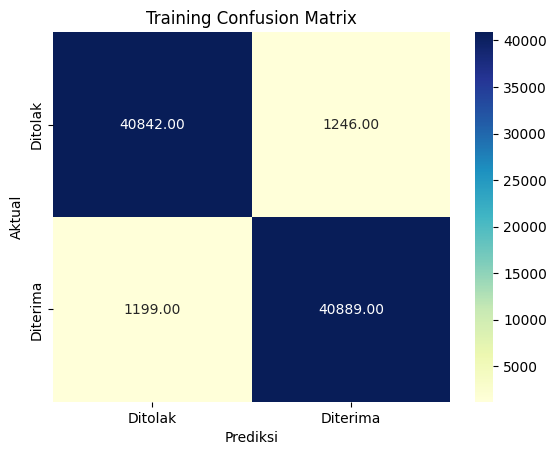

In [ ]:
# Train Model
trained_model = model_xgb.train_model(x_train_smote, y_train_smote, skf, k)

In [ ]:
# Print training result
model_xgb.print_metrics(trained_model, 'Training')


Training metrics 

Train Accuracy : 
 0.9709537477605903 

Train Precision : 
 0.9714862157494508 

Train Recall : 
 0.9703953349003236 

Train F1-Score : 
 0.9709380704482207 

Train F2-Score : 
 0.9706117827855945 

Train AUC : 
 0.9709536975776742 

Train MCC   : 
 0.941912710747693 



#### Test

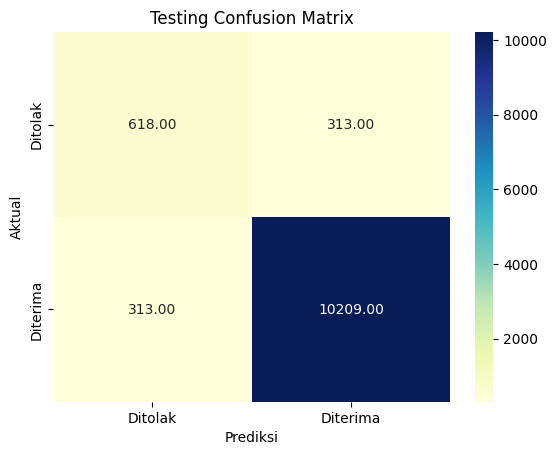


Testing metrics 

Test Accuracy : 
 0.9453418318344539 

Test Precision : 
 0.6638023630504833 

Test Recall : 
 0.6638023630504833 

Test F1-Score : 
 0.6638023630504833 

Test F2-Score : 
 0.6638023630504833 

Test AUC-ROC : 
 0.8170275833499899 

Test MCC Score : 
 0.6340551666999796 



In [ ]:
# Test Model
tested_model = model_xgb.test_model(x_test, y_test)

# Print test metrics
model_xgb.print_metrics(tested_model, 'Testing')

### Feature Importance

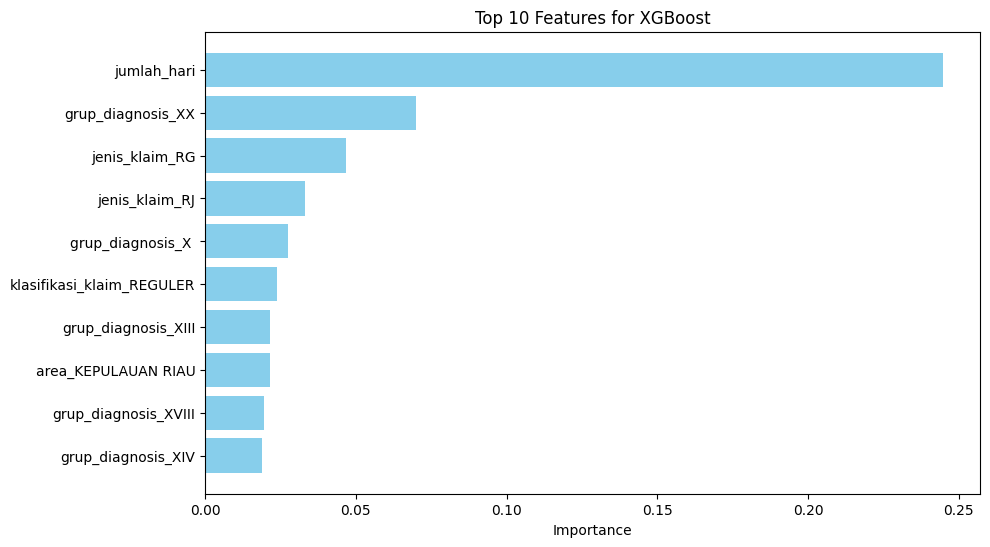

In [ ]:
# Get feature importances
importances = xgb.feature_importances_

# Create a dataframe to store the feature importances
feature_importances = pd.DataFrame({'Feature': x_test.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Select top 10 features
top_10_features = feature_importances['Feature'][:10]
top_10_importances = feature_importances['Importance'][:10]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features for XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

### Probabilities

#### default

In [ ]:
claimno_test = test_set['no_klaim']
pred_classes = xgb.predict(x_test)
pred_status = ['Ditolak' if c == 1 else 'Diterima' for c in pred_classes]
xgb_probs_test = xgb.predict_proba(x_test)[:, 1]
risklevel = ['LowRisk' if p < 0.5 else 'HighRisk' for p in xgb_probs_test]
aktual = ['Ditolak' if c == 1 else 'Diterima' for c in y_test]

recs_xgb = {
    'Nomor_Klaim'         : claimno_test,
    'Probabilitas_Ditolak': xgb_probs_test,
    'Tingkat_Risiko'      : risklevel,
    'Rekomendasi'         : pred_status,
    'Aktual'              : aktual
    }

recs_xgb = pd.DataFrame(recs_xgb)

In [ ]:
print(recs_xgb[135:145].to_string(index=False))

 Nomor_Klaim  Probabilitas_Ditolak Tingkat_Risiko Rekomendasi   Aktual
21/06/R02270              0.001042        LowRisk    Diterima Diterima
    99110988              0.997825       HighRisk     Ditolak  Ditolak
21/01/R04537              0.806439       HighRisk     Ditolak  Ditolak
    99943281              0.062878        LowRisk    Diterima Diterima
   101541392              0.001866        LowRisk    Diterima Diterima
    98439021              0.000234        LowRisk    Diterima Diterima
21/04/R01958              0.429768        LowRisk    Diterima  Ditolak
    97854089              0.001229        LowRisk    Diterima Diterima
    97551406              0.480614        LowRisk    Diterima Diterima
    97359705              0.004960        LowRisk    Diterima Diterima


In [ ]:
recs_xgb.to_excel('recs_xgb_before.xlsx',index=False)

### Threshold Adjustment

cari optimal threshold untuk memaksimalkan f2 score pada data training

In [ ]:
# Perform k-fold cv and get predicted probabilities
xgb_probs_train = cross_val_predict(xgb, x_train_smote, y_train_smote, cv=5, method='predict_proba')[:, 1]

# Generate a range of thresholds
thresholds = np.linspace(0.1, 1.0, 100)

# Initialize lists to store F2-scores and thresholds
f2_scores = []
for threshold in thresholds:
    preds_cv = (xgb_probs_train >= threshold).astype(int)
    f2 = fbeta_score(y_train_smote, preds_cv, beta=2)
    f2_scores.append(f2)

# Find the optimal threshold that maximizes F2-score
optimal_threshold = thresholds[np.argmax(f2_scores)]

In [ ]:
# Find the optimal threshold that maximizes F2-score
optimal_threshold = thresholds[np.argmax(f2_scores)]

visualisasi

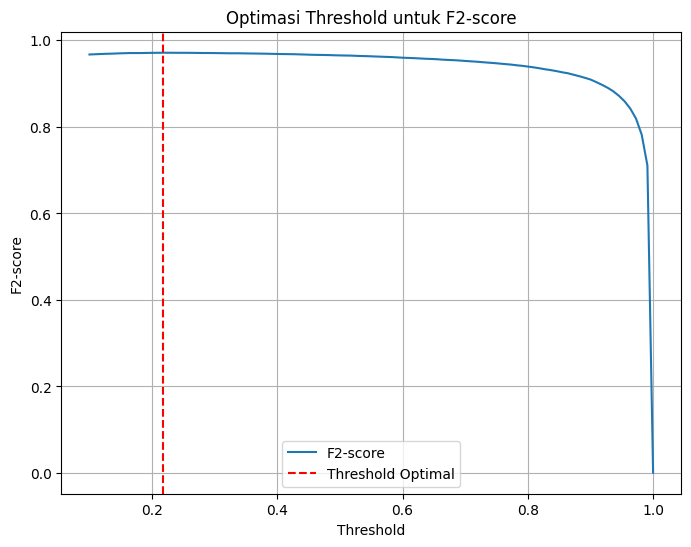

Threshold optimal untuk F2-score: 0.2181818181818182


In [ ]:
# Plot F2-score vs. Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f2_scores, label='F2-score')
plt.axvline(x=optimal_threshold, color='r', linestyle='--', label='Threshold Optimal')
plt.title('Optimasi Threshold untuk F2-score')
plt.xlabel('Threshold')
plt.ylabel('F2-score')
plt.legend()
plt.grid(True)
plt.show()

print("Threshold optimal untuk F2-score:", optimal_threshold)

aplikasikan threshold baru ke test set

In [ ]:
# Get predicted probabilities on the test set
xgb_probs_test = xgb.predict_proba(x_test)[:, 1]

# Apply the optimal threshold to obtain predicted labels
new_preds_test = (xgb_probs_test >= optimal_threshold).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, new_preds_test)
precision = precision_score(y_test, new_preds_test)
recall = recall_score(y_test, new_preds_test)
f1 = f1_score(y_test, new_preds_test)
f2 = fbeta_score(y_test, new_preds_test, beta=2)
auc_roc = roc_auc_score(y_test, new_preds_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"F2-score: {f2:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.9166
Precision: 0.4919
Recall: 0.7820
F1-score: 0.6039
F2-score: 0.6995
AUC-ROC: 0.8552


rekomendasi dgn threshold baru

In [ ]:

# Update threshold
new_preds = (xgb_probs_test >= optimal_threshold).astype(int)
claimno_test = test_set['no_klaim']
status = ['Ditolak' if c == 1 else 'Diterima' for c in new_preds]
aktual = ['Ditolak' if c == 1 else 'Diterima' for c in y_test]
xgb_probs = xgb.predict_proba(x_test)[:, 1]
risklevel = ['LowRisk' if p < optimal_threshold else 'HighRisk' for p in xgb_probs]


recs_xgb_new = {
    'Nomor_Klaim': claimno_test,
    'Probabilitas_Ditolak': xgb_probs,
    'Tingkat_Risiko': risklevel,
    'Rekomendasi': status,
    'Aktual': aktual
    }

recs_xgb_new = pd.DataFrame(recs_xgb_new)
print(recs_xgb_new[135:145].to_string(index=False))

 Nomor_Klaim  Probabilitas_Ditolak Tingkat_Risiko Rekomendasi   Aktual
21/06/R02270              0.001042        LowRisk    Diterima Diterima
    99110988              0.997825       HighRisk     Ditolak  Ditolak
21/01/R04537              0.806439       HighRisk     Ditolak  Ditolak
    99943281              0.062878        LowRisk    Diterima Diterima
   101541392              0.001866        LowRisk    Diterima Diterima
    98439021              0.000234        LowRisk    Diterima Diterima
21/04/R01958              0.429768       HighRisk     Ditolak  Ditolak
    97854089              0.001229        LowRisk    Diterima Diterima
    97551406              0.480614       HighRisk     Ditolak Diterima
    97359705              0.004960        LowRisk    Diterima Diterima


In [ ]:
recs_xgb_new.to_excel('recs_xgb_after.xlsx',index=False)